In [ ]:
from IPython.display import display, HTML

css = """
<style>
@page {
    margin: 15mm;
}
</style>
"""
display(HTML(css))


In [ ]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axisartist import Subplot
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [ ]:
# Reading of files
df_sales =pd.read_csv('sales.csv')
df_weather = pd.read_csv('weather.csv')
df_fuel= pd.read_csv('fuel.csv')

 First we begin with data cleaning which is the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to ensure that the data is accurate, complete, and consistent. It is a critical step in preparing data for analysis, and it ensures that the analysis is based on reliable data, leading to more accurate insights and conclusions.

In [ ]:
# Sales Data
df_sales.info()
df_sales.columns
df_sales.dtypes
df_sales.head(10)
df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Category      421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Holiday       421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
# Weather Data
df_weather.info()
df_weather.columns
df_weather.dtypes
df_weather.head(10)
df_weather.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB


,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
25%,12.000000,45.902500
50%,23.000000,60.710000
75%,34.000000,73.880000
max,45.000000,101.950000


In [ ]:
# Fuel Data
df_fuel.info()
df_fuel.columns
df_fuel.dtypes
df_fuel.head(10)
df_fuel.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store       8190 non-null   int64  
 1   Date        8190 non-null   object 
 2   Fuel_Price  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB


,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
25%,12.000000,3.041000
50%,23.000000,3.513000
75%,34.000000,3.743000
max,45.000000,4.468000


 Show the missing data and incorrect values for each column, such as zeros or negative sales.

In [ ]:
print(f"Sales Data: Number of missing values in each column:- \n{df_sales.isnull().sum()}")
print(f"Sales Data: Number of rows that have negative weekly sales:- \n{(df_sales['Weekly_Sales'] <= 0).sum()}")
print(f"fuel Data: Number of missing values in each column:- \n{df_fuel.isnull().sum()} ")
print(f"fuel Data: Number of rows that have negative fuel price :- \n{(df_fuel['Fuel_Price'] <= 0).sum()} ")
print(f"weather data:number of missing values in each column : \n{df_weather.isnull().sum()} ")

Sales Data: Number of missing values in each column:- 
Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
dtype: int64
Sales Data: Number of rows that have negative weekly sales:- 
1358
fuel Data: Number of missing values in each column:- 
Store         0
Date          0
Fuel_Price    0
dtype: int64 
fuel Data: Number of rows that have negative fuel price :- 
0 
weather data:number of missing values in each column : 
Store          0
Date           0
Temperature    0
dtype: int64 


 Here we replaced all the negative values by the mean of the column as by studying the data we concluded that this is the best way to deal with negative and missing values

In [ ]:
weekly_sales_mean = df_sales['Weekly_Sales'].mean()
df_sales.loc[df_sales['Weekly_Sales'] <= 0] = weekly_sales_mean
print(f"Sales Data: Number of rows that have negative weekly sales:- \n{(df_sales['Weekly_Sales'] <= 0).sum()}")

Sales Data: Number of rows that have negative weekly sales:- 
0


 Convert the 'Store' column in three data frames to integers, merges the data frames based on common columns, convert the 'Date' column to datetime format, and the 'Category' column to integers, and display information about the merged data frame using the 'info()' method.

In [ ]:
df_sales['Store'] = df_sales['Store'].astype(int)
df_fuel['Store'] = df_fuel['Store'].astype(int)
df_weather['Store'] = df_weather['Store'].astype(int)
df_merged = pd.merge(pd.merge(df_sales, df_fuel, on=['Date', 'Store']), df_weather, on=['Date', 'Store'])
df_merged['Date']=pd.to_datetime(df_merged['Date'])
df_merged['Category']=df_merged['Category'].astype(int)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 420211
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Category      420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   Holiday       420212 non-null  object        
 5   Fuel_Price    420212 non-null  float64       
 6   Temperature   420212 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 25.6+ MB


Then we proceed with data visualization which is the graphical representation of data and information, allowing analysts to explore and communicate insights and trends effectively. It takes many forms, requires careful consideration of the data, audience, and purpose, and is critical for data analysis and decision-making.

Line plot of the sum of weekly sales income over time using the 'plot()' method from 'matplotlib'. The plot's title, x-label, y-label, figure size, y-axis tick label format, and grid are set using various methods from 'matplotlib'.**bold text**

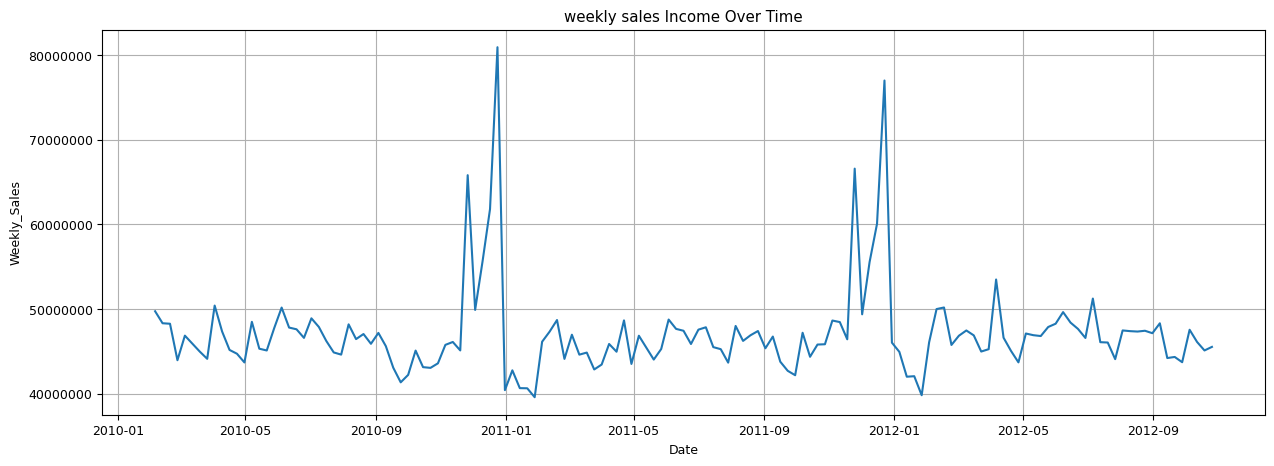

In [ ]:
graph = df_merged.groupby("Date")["Weekly_Sales"].sum()
plt.figure(figsize=(15, 5))
plt.plot(graph)
plt.title('weekly sales Income Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

Bar chart of weekly sales per brand using the 'plot()' method from 'matplotlib'. The data is grouped by 'Category', and the resulting series is sorted in descending order before plotting. Various methods from 'matplotlib' are used to set the figure size, x-label, y-label, title, x-tick labels, y-axis tick label format, and tight layout. Finally, the plot is displayed using the 'show()' method.

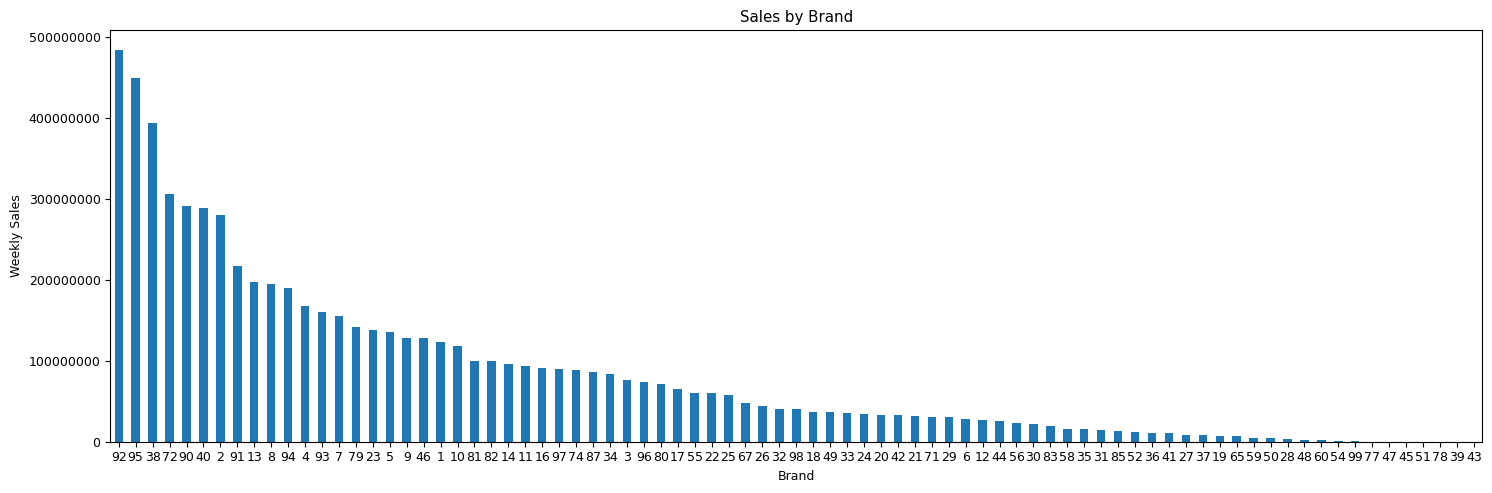

In [ ]:
Sales_per_brand=df_merged.groupby('Category')['Weekly_Sales'].sum()
Sales_per_brand = Sales_per_brand.sort_values(ascending=False)
plt.rcParams['font.size'] = 9
barchart=Sales_per_brand.plot(kind="bar", figsize=(15, 5))
plt.xlabel("Brand")
plt.ylabel("Weekly Sales")
plt.title("Sales by Brand")
plt.xticks(rotation=360)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Bar chart of the top 10 stores with the highest total sales by grouping and summing the 'Weekly_Sales' column of the 'df_merged' data frame. The chart is created using the 'plot()' method from 'matplotlib', with various attributes such as figure size, x-label, y-label, title, grid, x-tick labels, y-axis tick label format, and tight layout being set using methods from the same library. Finally, the plot is displayed using the 'show()' method.

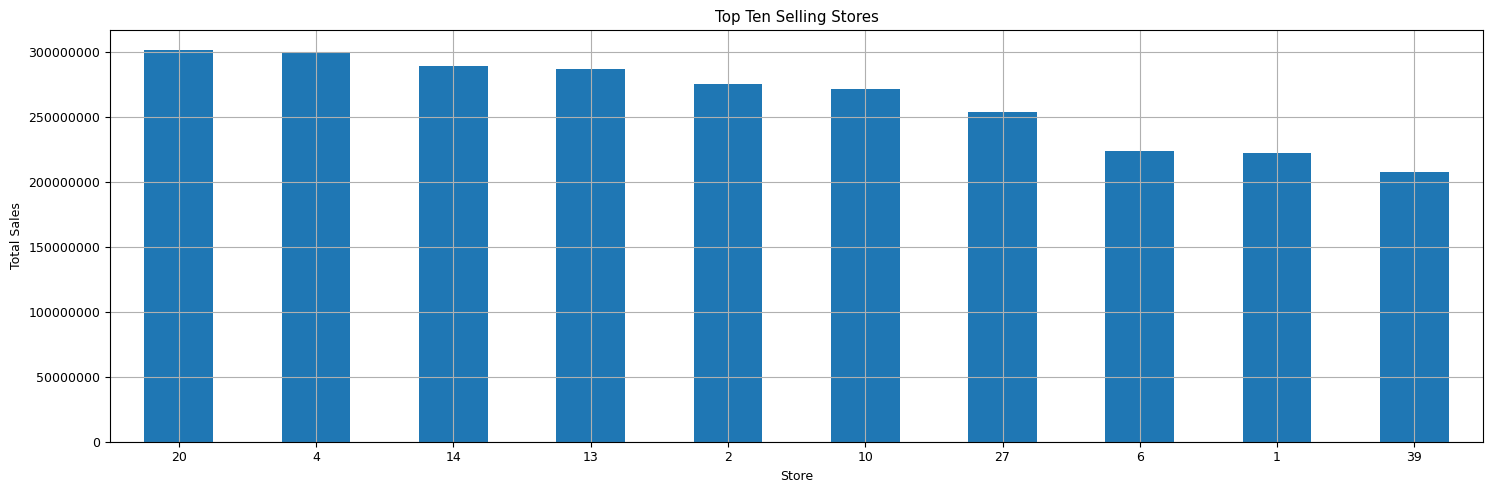

In [ ]:
top_stores = df_merged.groupby("Store")["Weekly_Sales"].sum().nlargest(10)
top_stores.plot(kind="bar", figsize=(15, 5))
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.title("Top Ten Selling Stores")
plt.grid(True)
plt.xticks(rotation=360)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


Histogram of the top 10 stores with the highest total sales by using the 'hist()' method from 'matplotlib'. The figure size, x-label, y-label, title, grid, x-tick labels, x-axis tick label format, and tight layout are set using various methods from the same library. Finally, the plot is displayed using the 'show()' method.

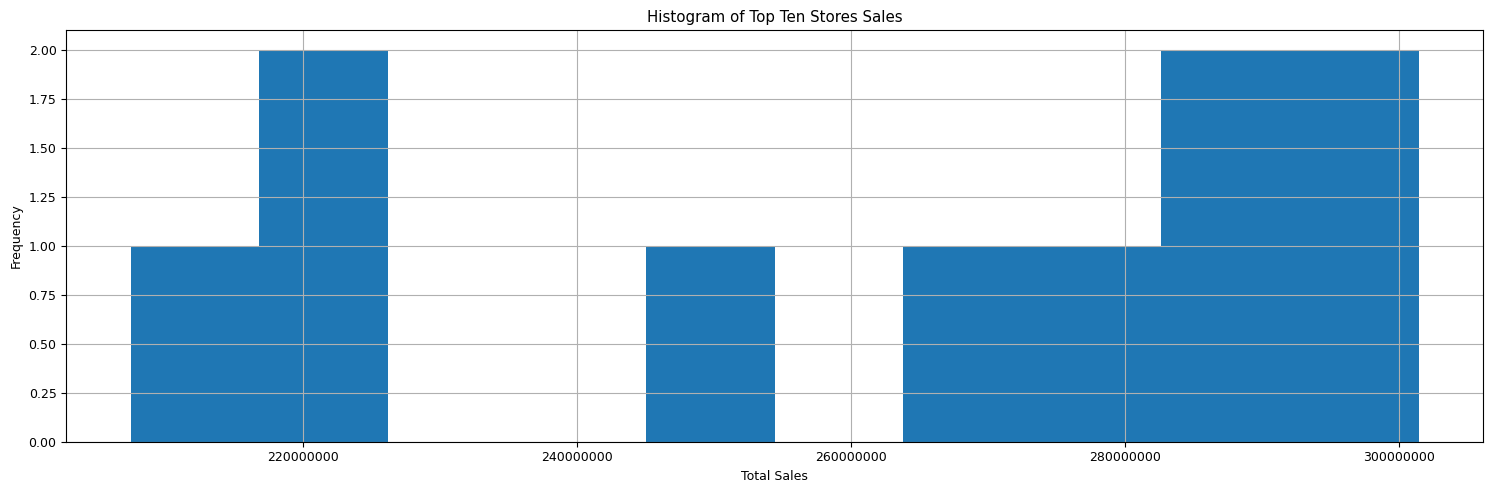

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(top_stores)
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Top Ten Stores Sales")
plt.grid(True)
plt.xticks(rotation=360)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

Bar chart showing the average weekly sales for the top 10 stores during holiday vs. non-holiday periods. It first creates a list of top stores based on their total sales. Then, it calculates the mean weekly sales for each store and holiday, creates a pivot table, and filters it to include only the top stores. Finally, a bar chart is created using the 'plot()' method from 'matplotlib', with various attributes such as figure size, x-label, y-label, title, grid, x-tick labels, legend, and tight layout being set using methods from the same library.

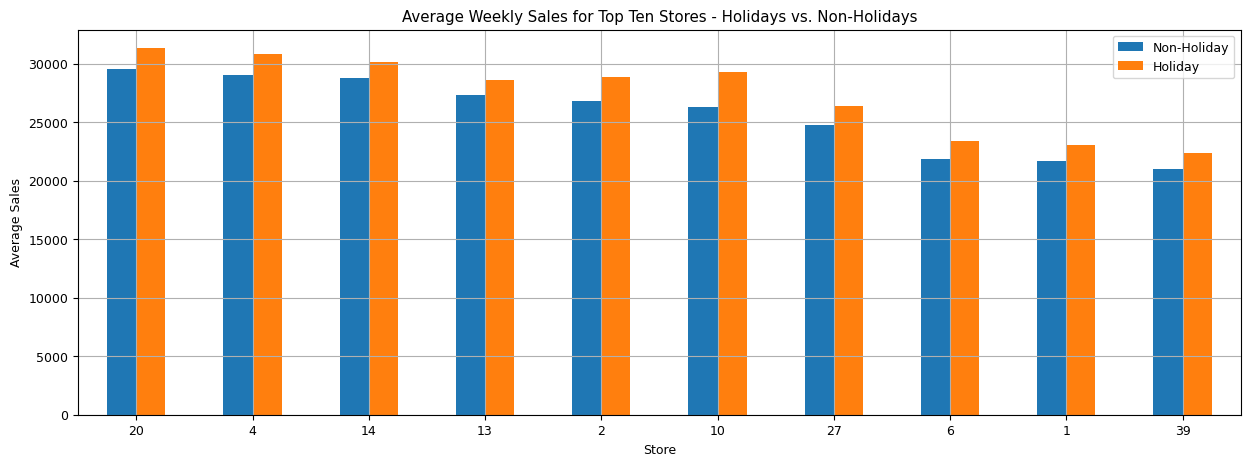

In [ ]:
top_stores_lst = top_stores.index.tolist()
avg_sales = df_merged.groupby(["Store", "Holiday"])["Weekly_Sales"].mean().unstack()
avg_sales = avg_sales.loc[top_stores_lst]
avg_sales.plot(kind="bar", figsize=(15, 5))
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.title("Average Weekly Sales for Top Ten Stores - Holidays vs. Non-Holidays")
plt.grid(True)
plt.xticks(rotation=360)
plt.legend(["Non-Holiday", "Holiday"])
plt.show()

 Stacked bar chart of the average weekly sales by brand department for the top 10 stores. It filters the 'df_merged' data frame to include only the top stores, calculates the mean weekly sales for each store and brand department, and creates a pivot table that is plotted as a stacked bar chart using 'matplotlib'. Various chart attributes such as figure size, x-label, y-label, title, x-tick labels, and legend are set using methods from the same library. Finally, the plot is displayed using the 'show()' method.

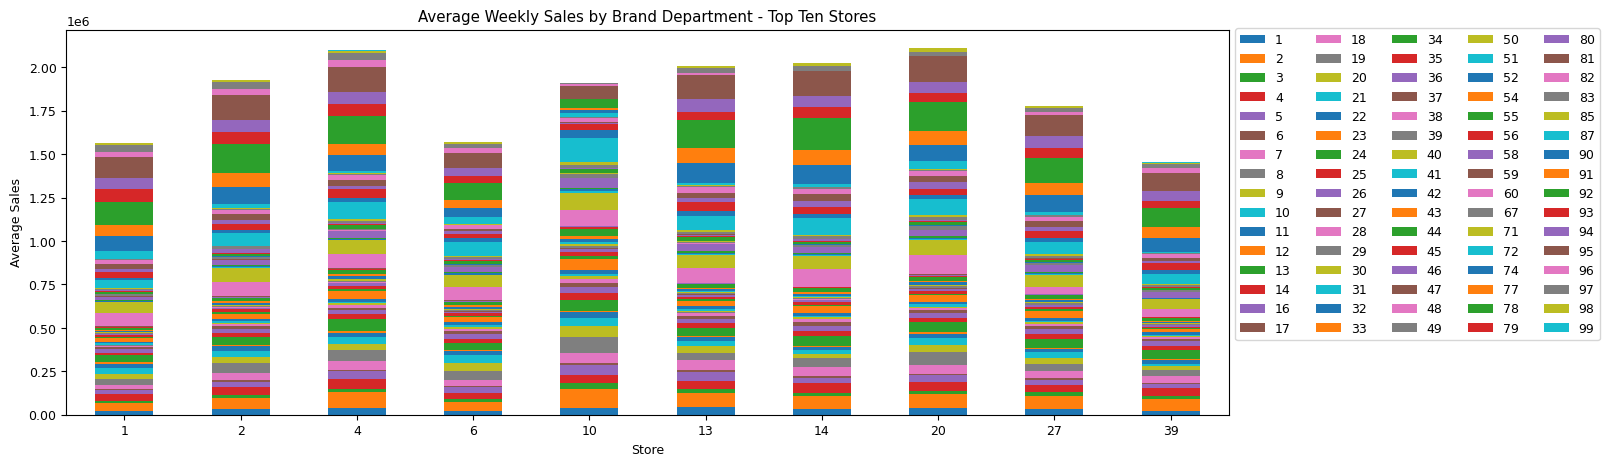

In [ ]:
df_top_stores = df_merged[df_merged["Store"].isin(top_stores.index)]
brand_avg_sales = df_top_stores.groupby(["Store", "Category"])["Weekly_Sales"].mean()
brand_avg_sales.unstack().plot(kind="bar", stacked=True, figsize=(15, 5))
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.title("Average Weekly Sales by Brand Department - Top Ten Stores")
plt.xticks(rotation=360)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1.02),ncol=5)
plt.show()

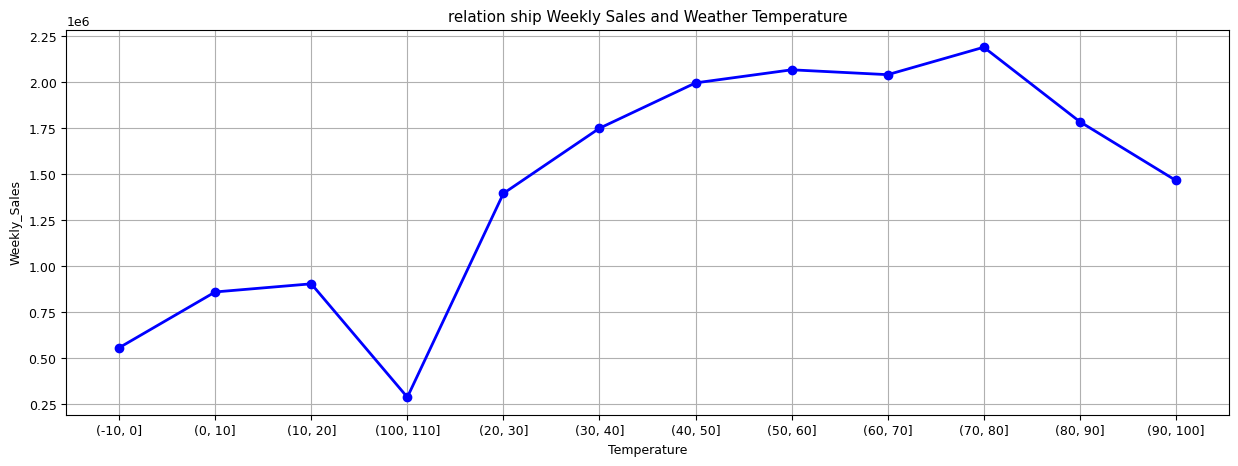

In [ ]:
#Calculate the mean weekly sales for each temperature range by grouping the sum of 'Weekly_Sales' by temperature and dividing
#the resulting series into temperature ranges using 'cut()'
chart = df_merged.groupby("Temperature")["Weekly_Sales"].sum()
temp_ranges = pd.cut(chart.index, bins=[-10, 10, 30, 50, 70, 90, 110])
temp_ranges_str = temp_ranges.astype(str)
weekly_sales_mean = chart.groupby(temp_ranges_str).mean()
# We want to focus on temperature and sales, we grouped by it with sales
chart = df_merged.groupby("Temperature")["Weekly_Sales"].sum()
# We couldn't indicate the relationship because of the many fluctuations, so we formed bins or ranges
temp_ranges = pd.cut(chart.index, bins=[-10,0, 10,20, 30,40, 50,60, 70,80, 90,100, 110])
# We grouped by the mean sales in each bin or range
temp_ranges_str = temp_ranges.astype(str)
weekly_sales_mean = chart.groupby(temp_ranges_str).mean()
# Here is the graph
plt.figure(figsize=(15, 5))
plt.plot(weekly_sales_mean, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue')
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")
plt.title("relation ship Weekly Sales and Weather Temperature")
plt.grid(True)
plt.show()

Create a figure with three subplots to visualize the relationship between the mean weekly sales, fuel price, and temperature over time. It groups the 'df_merged' data frame by 'Date' and calculates the mean of weekly sales, fuel price, and temperature for each date. It then plots fuel price, weekly sales, and temperature, and sets various chart attributes such as labels, titles, legend, grid, and tight layout using 'matplotlib'. Finally, the plot is displayed using the 'show()' method.

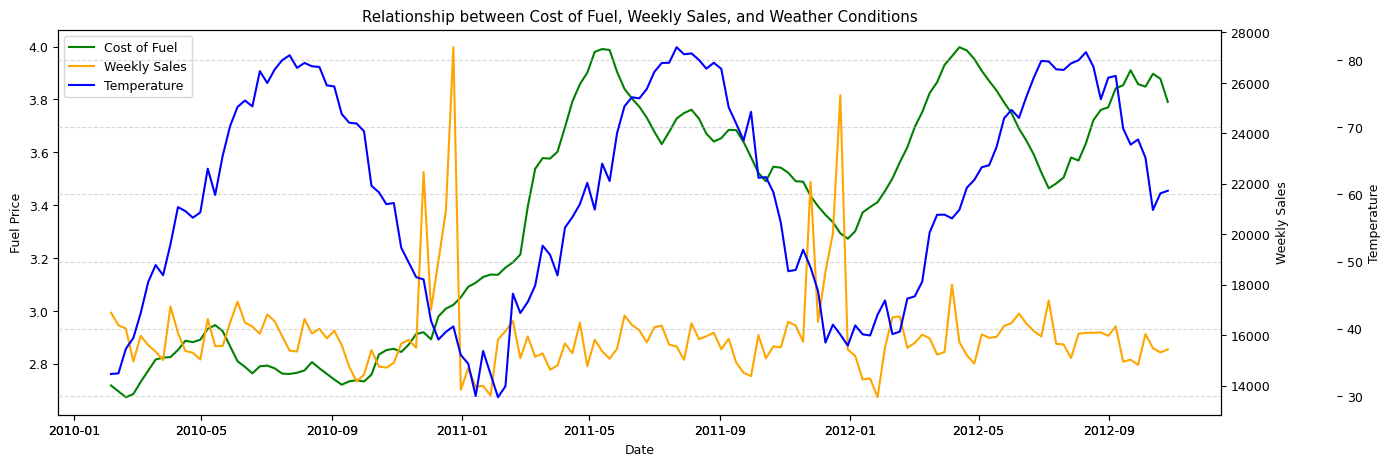

In [ ]:
df_subset = df_merged.groupby("Date")[['Weekly_Sales', 'Fuel_Price', 'Temperature']].mean()
fig = plt.figure(figsize=(15, 5))
fuel_axis = fig.add_subplot(111)
fuel_axis.plot(df_subset['Fuel_Price'], color='green', label='Cost of Fuel')
fuel_axis.set_ylabel('Fuel Price')
sales_axis = fuel_axis.twinx()
sales_axis.plot(df_subset['Weekly_Sales'], color='orange', label='Weekly Sales')
sales_axis.set_ylabel('Weekly Sales')
temp_axis = fig.add_subplot(111, sharex=fuel_axis, frameon=False)
temp_axis.plot(df_subset['Temperature'], color='blue', label='Temperature')
temp_axis.yaxis.tick_right()
temp_axis.yaxis.set_label_position("right")
temp_axis.set_ylabel('Temperature')
fuel_axis.set_xlabel('Date')
lines1, labels1 = fuel_axis.get_legend_handles_labels()
lines2, labels2 = sales_axis.get_legend_handles_labels()
lines3, labels3 = temp_axis.get_legend_handles_labels()
fuel_axis.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')
temp_axis.spines['right'].set_position(('axes', 1.10))
plt.title("Relationship between Cost of Fuel, Weekly Sales, and Weather Conditions")
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Create a pairplot of pairwise relationships between a selected subset of columns from the 'df_merged' data frame using the 'seaborn' library. The 'Holiday' column is converted to an integer data type, and a random sample of 100 rows is taken. Finally, the plot is displayed using 'matplotlib'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 420211
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Category      420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   Holiday       420212 non-null  object        
 5   Fuel_Price    420212 non-null  float64       
 6   Temperature   420212 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 25.6+ MB


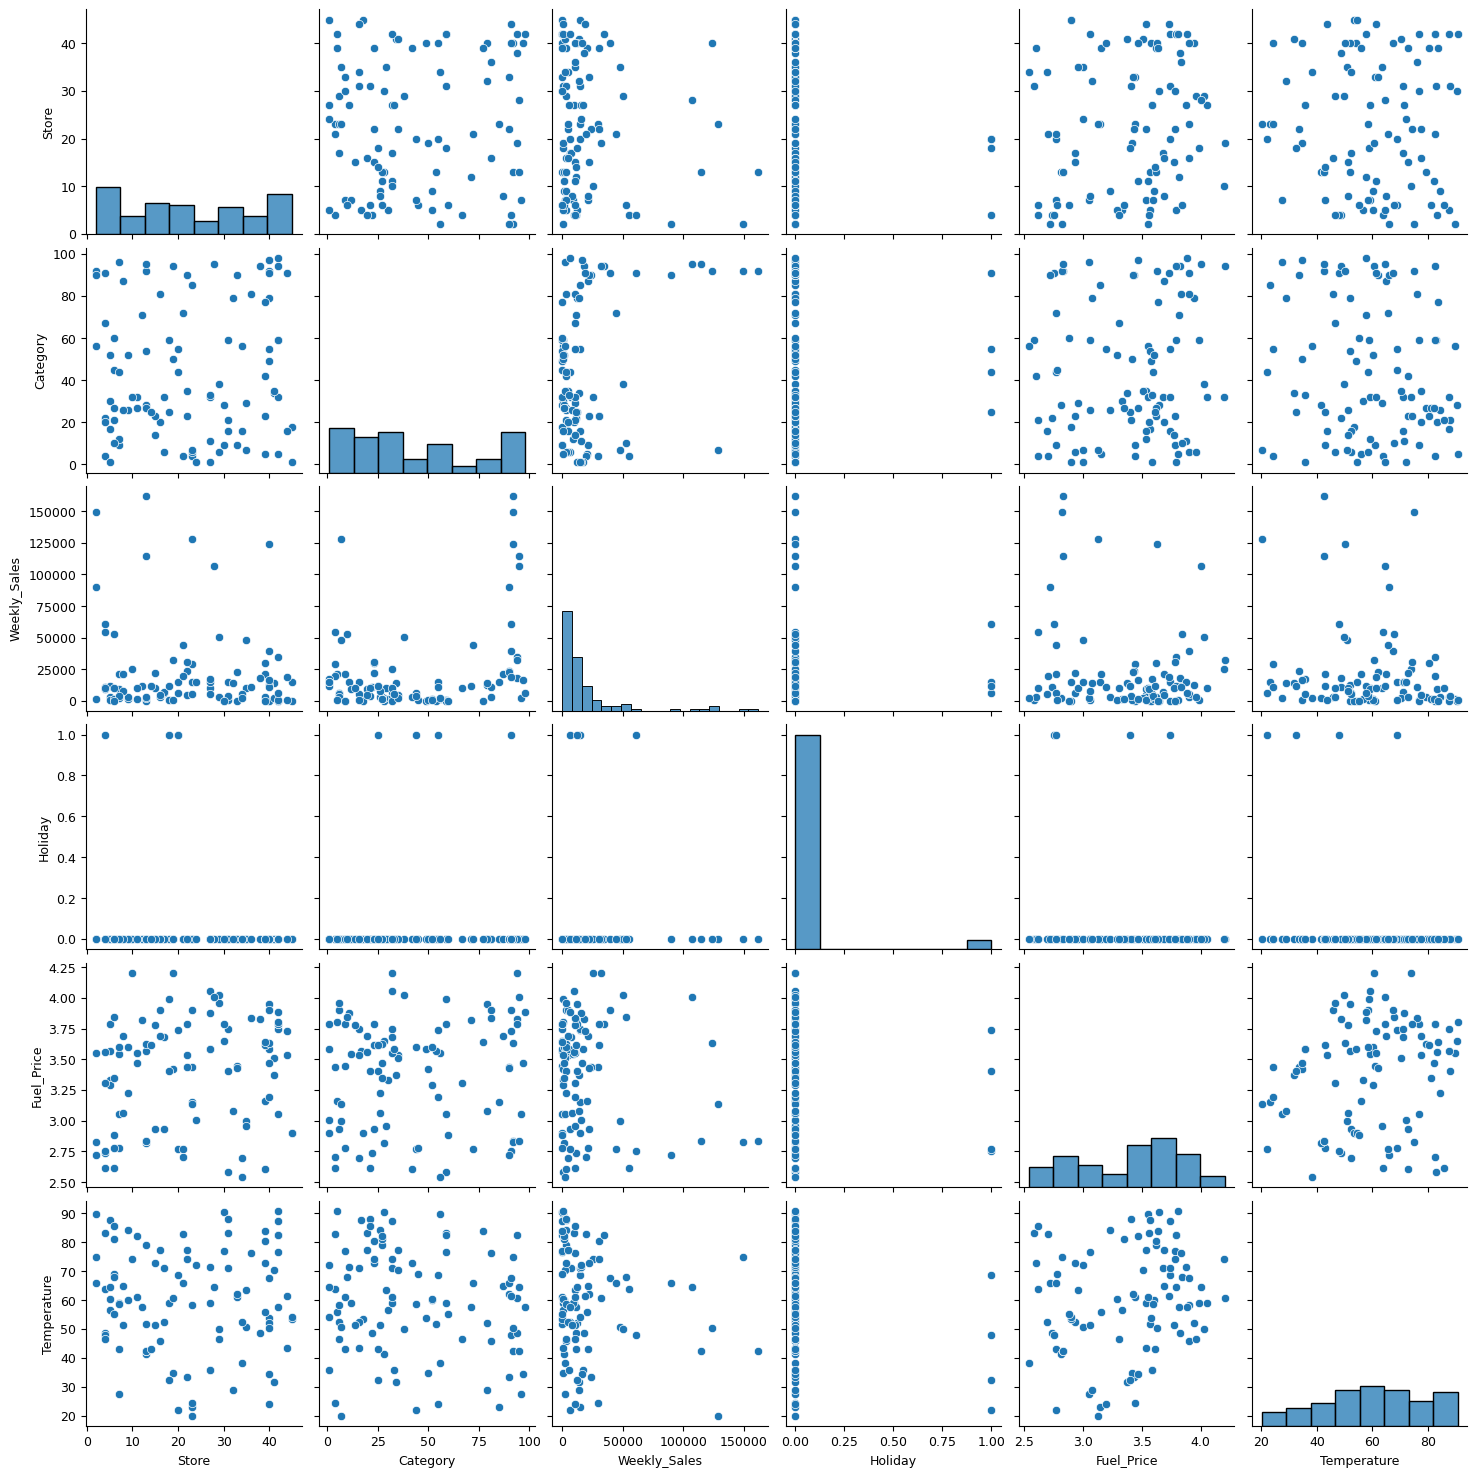

In [ ]:
df_merged.columns
df_merged.info()
df_merged['Holiday'] = df_merged['Holiday'].astype(int)
all_columns = df_merged[['Store', 'Category', 'Date', 'Weekly_Sales', 'Holiday', 'Fuel_Price','Temperature']].sample(n=100)
sns.pairplot(all_columns)
plt.show()

The last thing is data modelling which is creating a mathematical representation of a real-world system. It involves selecting variables, defining their relationships, and building a model to make predictions. This is important in data analysis for decision-making and process optimization.

 Use a correlation matrix to check for highly correlated features. If highly correlated features exist, consider dropping one of the correlated features we hava date and fuel price are highly correlated so we need to drop one of them , we choose fuel price since the date already captures the temporal information the final decision. On feature selection, we should consider domain knowledge, Sales are usually affected by seasons which means date in our case

<ipython-input-42-badae0753266>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_model.corr(),annot=True, cmap='Reds')


<Axes: >

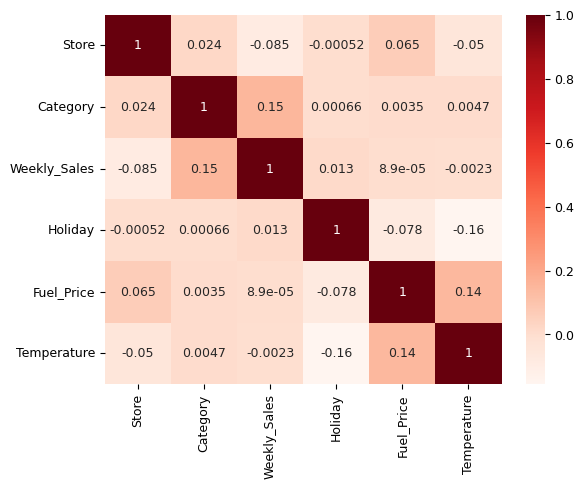

In [ ]:
# To preserve the original data
df_model = df_merged.copy()
sns.heatmap(df_model.corr(),annot=True, cmap='Reds')

In [ ]:
df_model=df_model.drop('Fuel_Price', axis=1)

In [ ]:
# Create the feature matrix X and the target vector y
features = df_model[['Store', 'Category', 'Date', 'Holiday', 'Temperature']]
target = df_model['Weekly_Sales']
# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=49)
# Numerical data has to be scaled before entering ML model.
# Standardize the features in training model, as the raw data will not be scaled before predictions.
scaler = preprocessing.StandardScaler()
standardized_feature = scaler.fit_transform(features_train[['Temperature']])
features_train['Temperature'] = standardized_feature

In [ ]:
# Linear Regression Model
features_train['Date']=features_train['Date'].map(dt.datetime.toordinal)
LR_model = LinearRegression()
LR_model.fit(features_train, target_train)
# datetime64 which can't be directly used in a linear regression mode
features_test['Date']=features_test['Date'].map(dt.datetime.toordinal)
# Make predictions on the test data
LR_predicted_target_test = LR_model.predict(features_test)
# Calculate mean squared error as it is regression (our target is continuous)
LR_mse = mean_squared_error(target_test, LR_predicted_target_test)
print("Mean Squared Error:", LR_mse)
# Calculate R-squared
LR_r2 = r2_score(target_test, LR_predicted_target_test)
print("R-squared:", LR_r2*100)

Mean Squared Error: 616767172.8629555
R-squared: -18.746973539671806


 After exploring outliers, it is pretty clear that the reason behind the poor performance of regresion model is outliers especially that they are alot. That's why we will use more robust models against outliers as we do not want to change the target column (Weekly Sales). because of that we shifted from linear models to ensamble model such as gradient boosting and random forest

<Axes: >

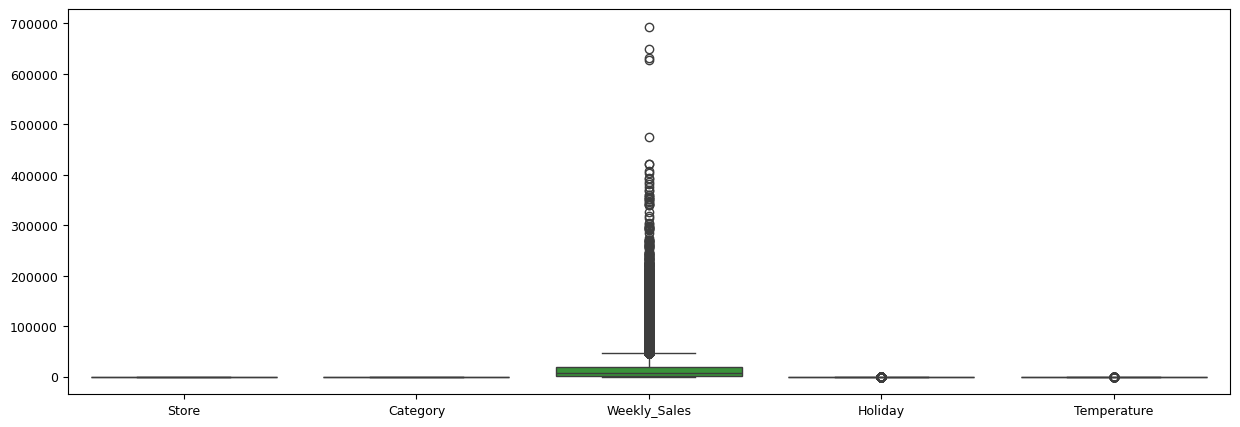

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_model)

In [ ]:
# Random Forest Regression
#Initialize Random Forest Regression model
RF_model = RandomForestRegressor()

#Fit the Random Forest Regression model
RF_model.fit(features_train, target_train)

#Predict target variable using the model on test features
RF_predicted_target_test = RF_model.predict(features_test)

#Calculate Mean Squared Error and R-squared of the model
RF_mse = mean_squared_error(target_test, RF_predicted_target_test)
RF_r2 = r2_score(target_test, RF_predicted_target_test)

#Print Mean Squared Error and R-squared of the model
print("Random Forest Regression:")
print("MSE:", RF_mse)
print("R2:", RF_r2)

Random Forest Regression:
MSE: 55821231.884177044
R2: 0.892526667482429


In [ ]:
# Compare the accuracy of the two models (in percentages)
print("Accuracy or R squared Random Forest Regression :", RF_r2*100,"%")
print("R-squared:", LR_r2*100,"%")

Accuracy or R squared Random Forest Regression : 89.2526667482429 %
R-squared: -18.746973539671806 %


 It is clear that Random Forest is better prediction model than Linear Regression. We could trust Random Forest predictions 89% of the times as it shows how close the predicted data to the actual data.


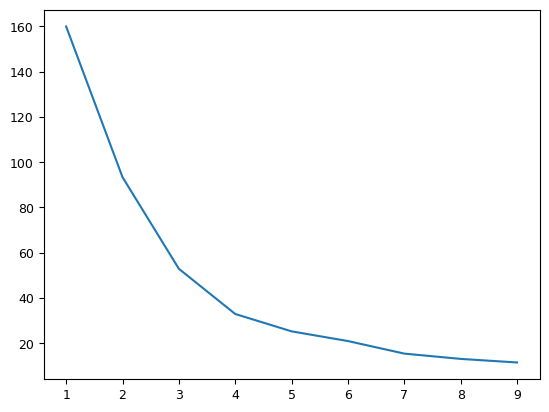

In [ ]:
# Create a clustering model to group together store categories with similar sales.

features = df_model[['Category', 'Weekly_Sales']].groupby('Category')['Weekly_Sales'].sum().reset_index()
arr = range(1, 10)
temp = []
# Normalize the data
features = (features - features.mean()) / (features.std())
# Elbow method to know the optimal number of clusters
for i in arr:
    x = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init to suppress the warning
    x.fit(features)
    temp.append(x.inertia_)

plt.plot(arr, temp)
plt.show()


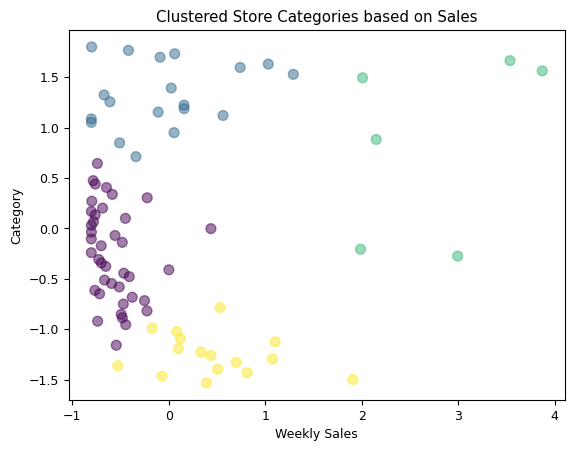

In [ ]:
# Fit the clustering algorithm to the data and assign number of clusters = 4
km = KMeans(n_clusters=4, n_init=10)  # Explicitly set n_init to suppress the warning
km.fit(features)

# Visualize the clusters
plt.scatter(features['Weekly_Sales'], features['Category'], c=km.labels_, s=50, alpha=0.5)
plt.xlabel('Weekly Sales')
plt.ylabel('Category')
plt.title('Clustered Store Categories based on Sales')
plt.show()